In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Xopt class, GPT CBETA DC GUN example

This is the class method for running Xopt.

In [2]:
from xopt import Xopt

In [3]:
import yaml

# Make a proper input file. 

YAML="""
xopt: {output_path: null, verbose: true,
  algorithm: cnsga}
  
algorithm:
  name: cnsga
  options: {max_generations: 16, population_size: 24, crossover_probability: 0.9, mutation_probability: 1.0,
  selection: auto, verbose: true, population: null}

simulation:
  name: gpt_with_distgen
  evaluate: gpt.gpt_distgen.evaluate_gpt_with_distgen
  

# Note that you can call another file in the top level group:
vocs: ../templates/cbeta_dcgun/cbeta_dcgun_vocs.yaml

"""
config = yaml.safe_load(YAML)

In [4]:
# Create object
X = Xopt(config=config)

# Show config
X

Loading config as dict.



            Xopt
________________________________           

Configured: True

Config as YAML:
xopt: {output_path: null, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  function: xopt.cnsga.cnsga
  options: {max_generations: 16, population_size: 24, crossover_probability: 0.9,
    mutation_probability: 1.0, selection: auto, verbose: true, population: null, seed: null}
simulation:
  name: gpt_with_distgen
  evaluate: gpt.gpt_distgen.evaluate_gpt_with_distgen
  options: {archive_path: null, merit_f: null, gpt_input_file: /Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_gpt.in,
    distgen_input_file: /Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_distgen.yaml,
    workdir: null, use_tempdir: true, gpt_bin: /Users/chrisonian/Code/xgpt/gpt321MacOSX/bin/gpt,
    timeout: 2500, auto_phase: false, verbose: false, gpt_verbose: false, asci2gdf_bin: /Users/chrisonian/Code/xgpt/gpt321MacOSX/bin/asci2gdf}
vocs:
  name: cu dc

In [5]:
# Check vocs
X.vocs

{'name': 'cu dcgun',
 'description': 'Test case',
 'simulation': 'gpt_with_distgen',
 'templates': {'gpt_input_file': '/Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_gpt.in',
  'distgen_input_file': '/Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_distgen.yaml'},
 'variables': {'r_dist:sigma_xy:value': [0.0, 10],
  'r_dist:alpha:value': [0.1, 1.0],
  't_dist:sigma_t:value': [0.0, 0.57],
  't_dist:alpha:value': [0.0, 1.0],
  'total_charge:value': [0.0, 5.0],
  'sol_1_current': [0.0, 5.0]},
 'constants': {'n_particle': 200, 'gun_voltage': 375},
 'objectives': {'end_total_charge': 'MAXIMIZE', 'end_norm_emit_x': 'MINIMIZE'},
 'constraints': {'end_n_particle_loss': ['LESS_THAN', 1]},
 'linked_variables': None}

In [6]:
# Check random inputs
X.random_inputs()

{'r_dist:sigma_xy:value': 9.83825121757796,
 'r_dist:alpha:value': 0.5988799387653181,
 't_dist:sigma_t:value': 0.008049227736424394,
 't_dist:alpha:value': 0.12120780053620583,
 'total_charge:value': 4.95190954494947,
 'sol_1_current': 3.899354584550052,
 'n_particle': 200,
 'gun_voltage': 375}

In [7]:
?X.random_evaluate

Signature: X.random_evaluate(check_vocs=True)
Docstring:
Makes random inputs and runs evaluate.

If check_vocs, will check that all keys in vocs constraints and objectives are in output.
File:      ~/Code/GitHub/xopt/xopt/xopt.py
Type:      method


In [8]:
%%time
# Do a random evaluate to check that everything will run
x=X.random_evaluate(check_vocs=True)
print(x)

{'error': False, 'end_n_particle': 149, 'end_norm_emit_x': 1.812743019736431e-05, 'end_norm_emit_y': 1.6967173684429125e-05, 'end_higher_order_energy_spread': 219.3520883506521, 'end_mean_x': -1.6536773469511227e-05, 'end_sigma_x': 0.006490174876828647, 'end_min_x': -0.01718459672612407, 'end_max_x': 0.01697107090593142, 'end_mean_y': -5.9266989001766596e-05, 'end_sigma_y': 0.006379976201820692, 'end_min_y': -0.01702419656730656, 'end_max_y': 0.015276817457563704, 'end_mean_z': 0.922, 'end_sigma_z': 7.276241125344999e-17, 'end_min_z': 0.9219999999999999, 'end_max_z': 0.9220000000000002, 'end_mean_r': 0.0077948413591401484, 'end_sigma_r': 0.0046979464124568705, 'end_min_r': 0.0004945239995808275, 'end_max_r': 0.01846815237712541, 'end_mean_theta': 0.034883410234373156, 'end_sigma_theta': 1.812507488832856, 'end_min_theta': -3.123237563923082, 'end_max_theta': 3.12869112881143, 'end_mean_px': -17.134593787238963, 'end_sigma_px': 6934.051545417852, 'end_min_px': -14056.621677806377, 'end_

In [9]:
X.vocs['constraints']

{'end_n_particle_loss': ['LESS_THAN', 1]}

In [10]:
# These are the algorithm options
X.algorithm['options']

{'max_generations': 16,
 'population_size': 24,
 'crossover_probability': 0.9,
 'mutation_probability': 1.0,
 'selection': 'auto',
 'verbose': True,
 'population': None,
 'seed': None}

In [11]:
# These are the options in the evaluate function
X.simulation['options']

{'archive_path': None,
 'merit_f': None,
 'gpt_input_file': '/Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_gpt.in',
 'distgen_input_file': '/Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_distgen.yaml',
 'workdir': None,
 'use_tempdir': True,
 'gpt_bin': '/Users/chrisonian/Code/xgpt/gpt321MacOSX/bin/gpt',
 'timeout': 2500,
 'auto_phase': False,
 'verbose': False,
 'gpt_verbose': False,
 'asci2gdf_bin': '/Users/chrisonian/Code/xgpt/gpt321MacOSX/bin/asci2gdf'}

# Run CNSGA using processes or threads

In [12]:
from concurrent.futures import ProcessPoolExecutor as PoolExecutor
#from concurrent.futures import ThreadPoolExecutor as PoolExecutor
executor = PoolExecutor()

In [13]:
X.run_cnsga(executor=executor)




 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continuous Non-dominated Sorting Genetic Algorithm


Creating toolbox from vocs.
Created toolbox with 6 variables, 1 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'gun_voltage': 375, 'n_particle': 200},
 'constraints': {'end_n_particle_loss': ['LESS_THAN', 1]},
 'description': 'Test case',
 'linked_variables': None,
 'name': 'cu dcgun',
 'objectives': {'end_norm_emit_x': 'MINIMIZE', 'end_total_charge': 'MAXIMIZE'},
 'simulation': 'gpt_with_distgen',
 'templates': {'di

/Users/chrisonian/Code/GitHub/distgen/distgen/dist.py:519: RuntimeWarning: overflow encountered in float_power
  rho = N*np.exp(-np.float_power(nu1.magnitude,self.p.magnitude))


..........done.
__________________________________________________________
Generation 2 completed in 0.34881 minutes
.....................

/Users/chrisonian/Code/GitHub/distgen/distgen/dist.py:519: RuntimeWarning: overflow encountered in float_power
  rho = N*np.exp(-np.float_power(nu1.magnitude,self.p.magnitude))


...done.
__________________________________________________________
Generation 3 completed in 0.44989 minutes
........................done.
__________________________________________________________
Generation 4 completed in 0.42367 minutes
........................done.
__________________________________________________________
Generation 5 completed in 0.54289 minutes
........................done.
__________________________________________________________
Generation 6 completed in 0.64628 minutes
........................done.
__________________________________________________________
Generation 7 completed in 0.71126 minutes
........................done.
__________________________________________________________
Generation 8 completed in 0.75211 minutes
........................done.
__________________________________________________________
Generation 9 completed in 0.73889 minutes
........................done.
__________________________________________________________
Generation 10 c

/Users/chrisonian/Code/GitHub/distgen/distgen/dist.py:519: RuntimeWarning: overflow encountered in float_power
  rho = N*np.exp(-np.float_power(nu1.magnitude,self.p.magnitude))


..........done.
__________________________________________________________
Generation 14 completed in 0.86085 minutes
.........

/Users/chrisonian/Code/GitHub/distgen/distgen/dist.py:519: RuntimeWarning: overflow encountered in float_power
  rho = N*np.exp(-np.float_power(nu1.magnitude,self.p.magnitude))


...............done.
__________________________________________________________
Generation 15 completed in 0.99372 minutes


# Ouput
The last generation, as well as important simulation data is saved in xopt.population:

In [14]:
print('Available population data:',list(X.results.keys()))
print('See which individuals had errors:', X.results['error'])

Available population data: ['variables', 'generation', 'vocs', 'error', 'inputs', 'outputs']
See which individuals had errors: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


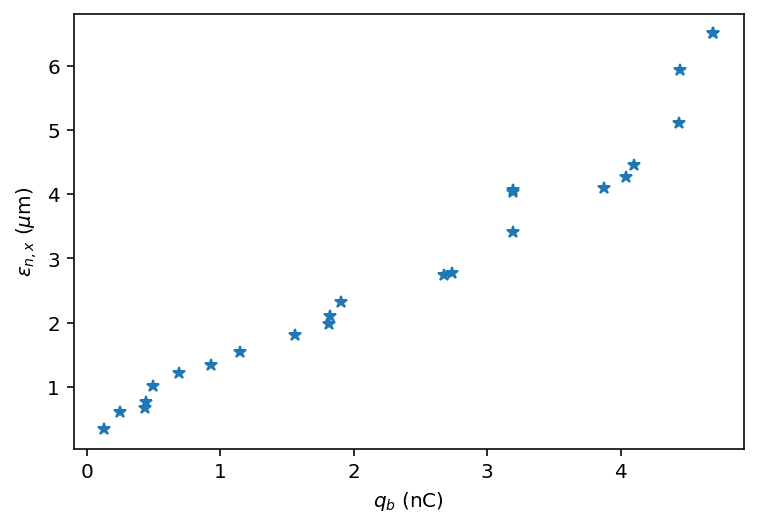

In [15]:
from matplotlib import pyplot as plt
import matplotlib 
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

qs =  np.array([indin['total_charge:value'] for indin in X.results['inputs']])
ens = np.array([indout['end_norm_emit_x'] for indout in X.results['outputs']])*1e6

plt.plot(qs, ens, '*')
plt.xlabel('$q_b$ (nC)')
plt.ylabel('$\epsilon_{n,x}$ ($\mu$m)');

# Write this configuration

In [16]:
X.save('test.yaml')

Config written as YAML to test.yaml


In [17]:
!cat test.yaml

xopt: {output_path: null, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  function: xopt.cnsga.cnsga
  options: {max_generations: 16, population_size: 24, crossover_probability: 0.9,
    mutation_probability: 1.0, selection: auto, verbose: true, population: null, seed: null}
simulation:
  name: gpt_with_distgen
  evaluate: gpt.gpt_distgen.evaluate_gpt_with_distgen
  options: {archive_path: null, merit_f: null, gpt_input_file: /Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_gpt.in,
    distgen_input_file: /Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_distgen.yaml,
    workdir: null, use_tempdir: true, gpt_bin: /Users/chrisonian/Code/xgpt/gpt321MacOSX/bin/gpt,
    timeout: 2500, auto_phase: false, verbose: false, gpt_verbose: false, asci2gdf_bin: /Users/chrisonian/Code/xgpt/gpt321MacOSX/bin/asci2gdf}
vocs:
  name: cu dcgun
  description: Test case
  simulation: gpt_with_distgen
  templates: {gpt_input_file: /Users/

# Run with MPI

In [18]:
!mpirun -n 4 python -m mpi4py.futures -m xopt.mpi.run test.yaml

  _   
                | |  
__  _____  _ __ | |_ 
\ \/ / _ \| '_ \| __|
 >  < (_) | |_) | |_ 
/_/\_\___/| .__/ \__|
          | |        
          |_|        

_________________________________
Parallel execution with 4 workers
Loading as YAML file: test.yaml

            Xopt
________________________________           

Configured: True

Config as YAML:
xopt: {output_path: null, verbose: true, algorithm: cnsga}
algorithm:
  name: cnsga
  function: xopt.cnsga.cnsga
  options: {max_generations: 16, population_size: 24, crossover_probability: 0.9,
    mutation_probability: 1.0, selection: auto, verbose: true, population: null, seed: null}
simulation:
  name: gpt_with_distgen
  evaluate: gpt.gpt_distgen.evaluate_gpt_with_distgen
  options: {archive_path: null, merit_f: null, gpt_input_file: /Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_gpt.in,
    distgen_input_file: /Users/chrisonian/Code/GitHub/xopt/examples/templates/cbeta_dcgun/cbeta_dcgun_distgen.yam

# Dask 

In [19]:
from dask.distributed import Client
executor = Client()
executor

/Users/chrisonian/Code/miniconda3/envs/devel/lib/python3.7/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:59130 Dashboard: http://127.0.0.1:59131/status,Cluster Workers: 4 Cores: 8 Memory: 17.18 GB


In [20]:
# Wait a few seconds for the Dask cluster to start
from time import sleep
sleep(5)

In [21]:
# Increase the number of generations
X.algorithm['options']['max_generations'] = 7
X.run_cnsga(executor)




 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continuous Non-dominated Sorting Genetic Algorithm


Creating toolbox from vocs.
Warning in cnsga_toolbox: Redefining creator.Individual
Created toolbox with 6 variables, 1 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'gun_voltage': 375, 'n_particle': 200},
 'constraints': {'end_n_particle_loss': ['LESS_THAN', 1]},
 'description': 'Test case',
 'linked_variables': None,
 'name': 'cu dcgun',
 'objectives': {'end_norm_emit_x': 'MINIMIZE', 'end_total_charge': 'MAXIMIZE'

In [22]:
X.population.keys()

dict_keys(['variables', 'generation', 'vocs', 'error', 'inputs', 'outputs'])

# Cleanup

In [23]:
!rm -r dask-worker-space

In [24]:
!rm test.yaml